# Descriptive Analysis

## Preparation of the Environment

### Import libraries

In [1]:
import sys
sys.path.append("..")

In [2]:
import os
import logging
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import unicorn_analysis.utils.descriptive_analysis_functions as uf
import unicorn_analysis.visualization.descriptive_analysis_graphs as vg

### Define styles

In [4]:
%matplotlib inline
sns.set_style(style='whitegrid')
sns.set_context(context='notebook')
plt.rcParams['figure.figsize'] = (11, 9.4)

logging.basicConfig(
    format = '%(message)s', 
    level=logging.DEBUG,  
    encoding="utf-8"
    )

### Load Data

In [11]:
df = pd.read_csv(os.path.join(os.getcwd(), os.pardir, 'data', 'processed', 'unicorn_companies_prepared.csv'))
df = df.astype({'Date Joined': 'datetime64', 'Industry': 'category', 'Continent': 'category'})
df.head()

,Company,Valuation,Date Joined,Industry,City,Country,Continent,Year Founded,Funding,Select Investors
0,Bytedance,180,2017-04-07,Artificial intelligence,Beijing,China,Asia,2012,8.0,"Sequoia Capital China, SIG Asia Investments, S..."
1,SpaceX,100,2012-12-01,Other,Hawthorne,United States,North America,2002,7.0,"Founders Fund, Draper Fisher Jurvetson, Rothen..."
2,SHEIN,100,2018-07-03,E-commerce & direct-to-consumer,Shenzhen,China,Asia,2008,2.0,"Tiger Global Management, Sequoia Capital China..."
3,Stripe,95,2014-01-23,Fintech,San Francisco,United States,North America,2010,2.0,"Khosla Ventures, LowercaseCapital, capitalG"
4,Klarna,46,2011-12-12,Fintech,Stockholm,Sweden,Europe,2005,4.0,"Institutional Venture Partners, Sequoia Capita..."


## Analysis

In [12]:
df.describe(include=[object, 'category'])

,Company,Industry,City,Country,Continent,Select Investors
count,1045,1045,1045,1045,1045,1045
unique,1044,16,253,44,6,1031
top,Bolt,Fintech,San Francisco,United States,North America,"Two Sigma Ventures, Flint Capital, Commerce Ve..."
freq,2,216,152,555,580,2


In [13]:
df.describe(datetime_is_numeric=True)

,Valuation,Date Joined,Year Founded,Funding
count,1045.000000,1045,1045.000000,1045.000000
mean,3.478469,2020-05-20 16:23:53.110047744,2012.885167,0.557741
min,1.000000,2011-04-02 00:00:00,1919.000000,0.000000
25%,1.000000,2019-05-16 00:00:00,2011.000000,0.223000
50%,2.000000,2021-03-26 00:00:00,2014.000000,0.370000
75%,3.000000,2021-09-21 00:00:00,2016.000000,0.610000
max,180.000000,2022-04-05 00:00:00,2021.000000,14.000000
std,8.612828,NaN,5.698879,0.814560


**Company**

In [14]:
df[df['Company'] == 'Bolt']

,Company,Valuation,Date Joined,Industry,City,Country,Continent,Year Founded,Funding,Select Investors
39,Bolt,11,2018-05-29,Auto & transportation,Tallinn,Estonia,Europe,2013,1.0,"Didi Chuxing, Diamler, TMT Investments"
43,Bolt,11,2021-10-08,Fintech,San Francisco,United States,North America,2014,1.0,"Activant Capital, Tribe Capital, General Atlantic"


**Valuation**

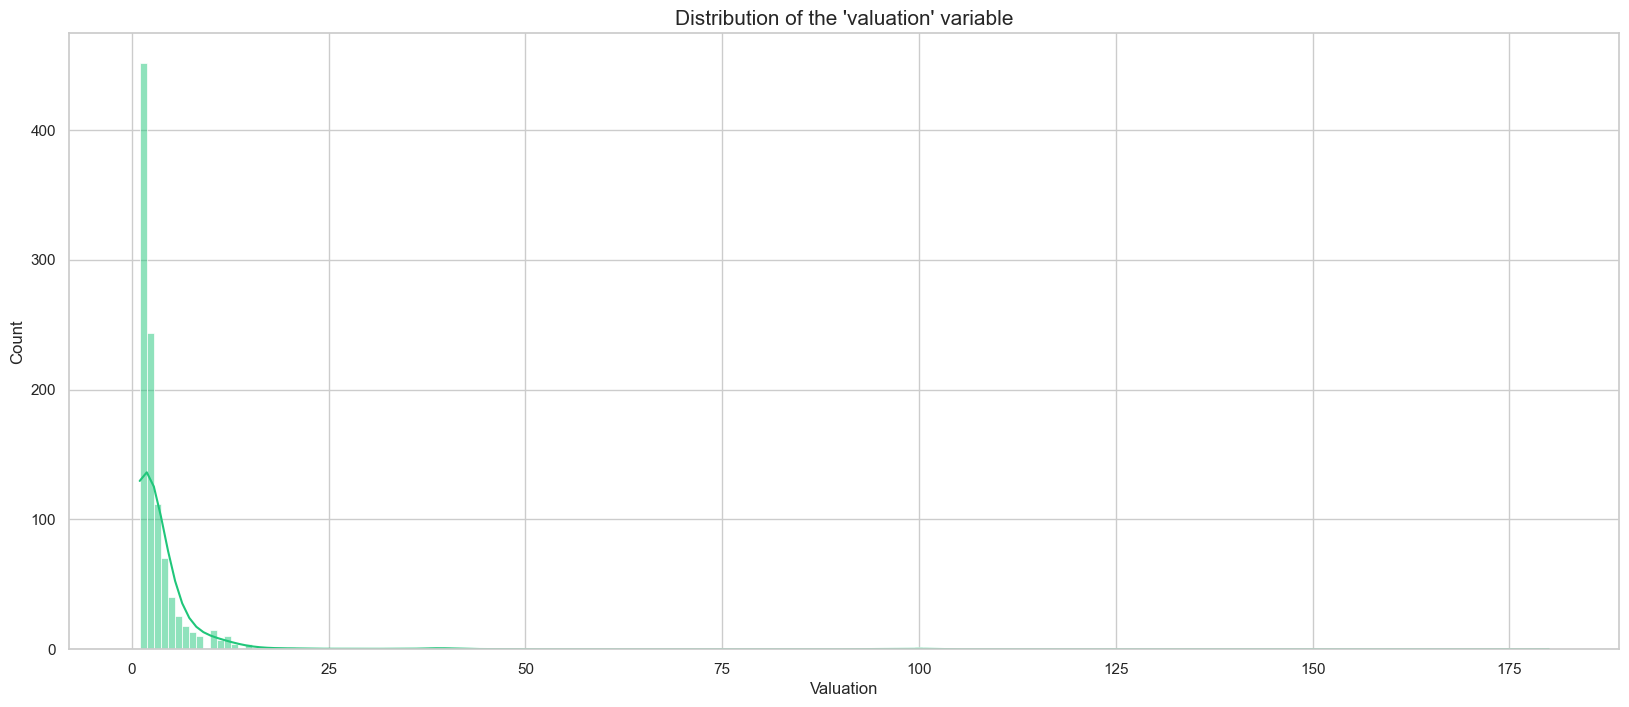

In [16]:
vg.histplot_variable_variation(df, 'Valuation', [20,8], "Distribution of the 'valuation' variable")

In [17]:
uf.numerical_variable_variation(df['Valuation'])

Valor Minimo: 1.0
Valor Maximo: 180.0
Rango: 179.0
Media: 3.48
Desviacion Estandar: 8.61


**Industry**

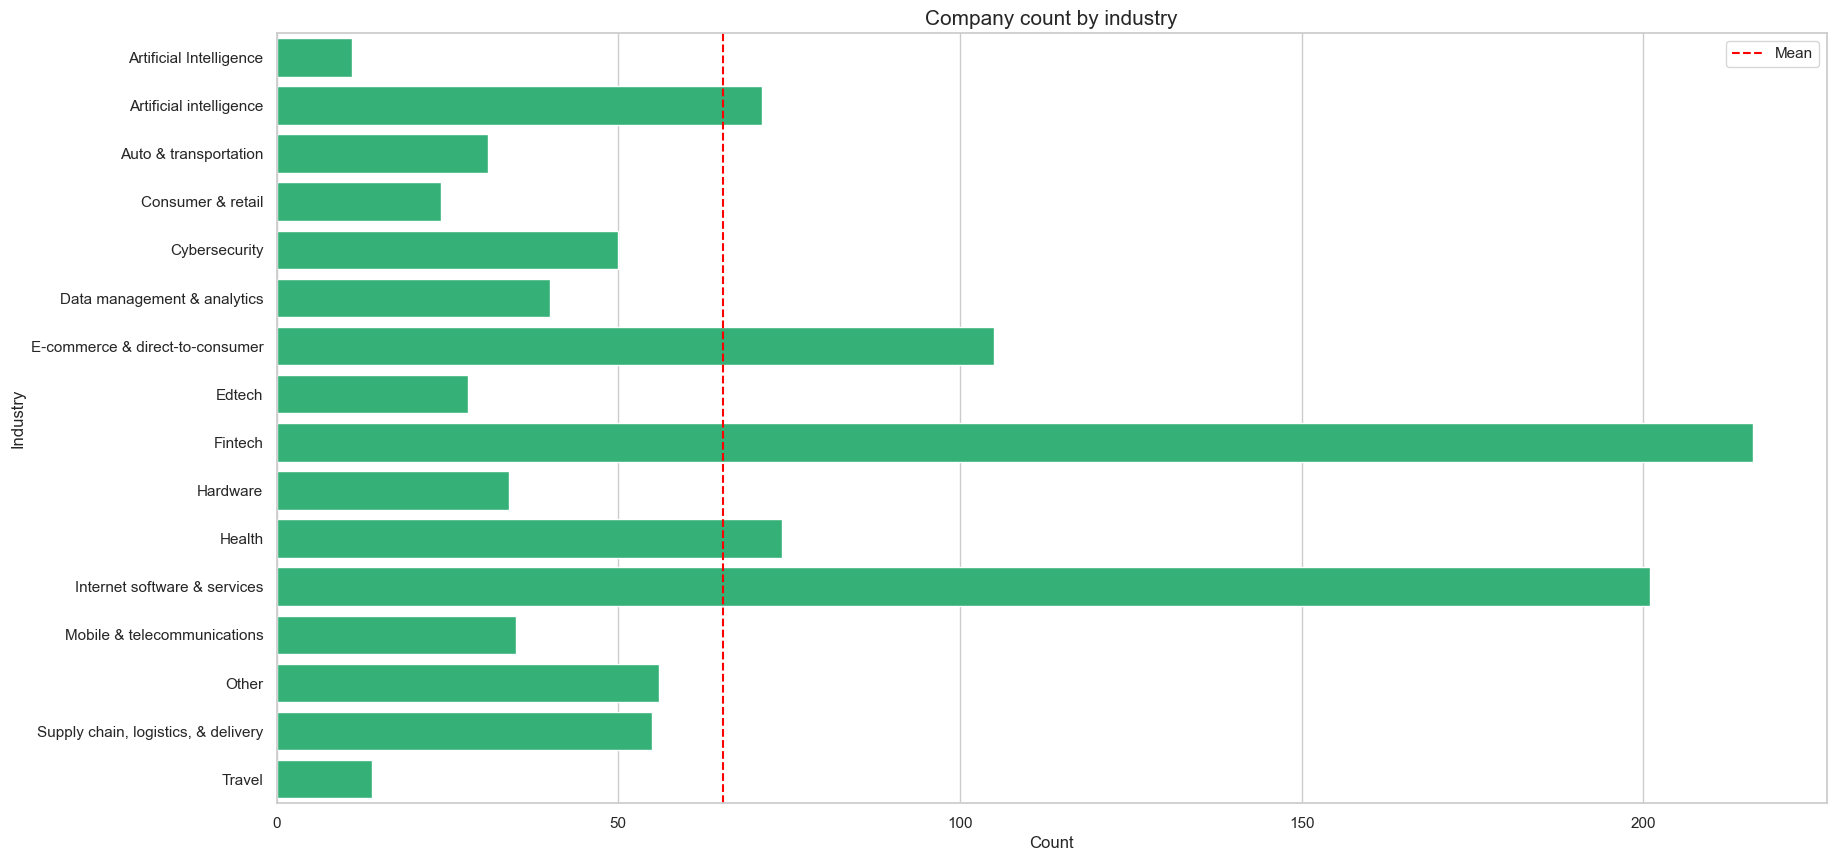

31.25% above average


In [18]:
vg.bargraph_without_delimitation(df, 'Industry', [20, 10], "Company count by industry", uf.average(df, 'Industry'))

**City**

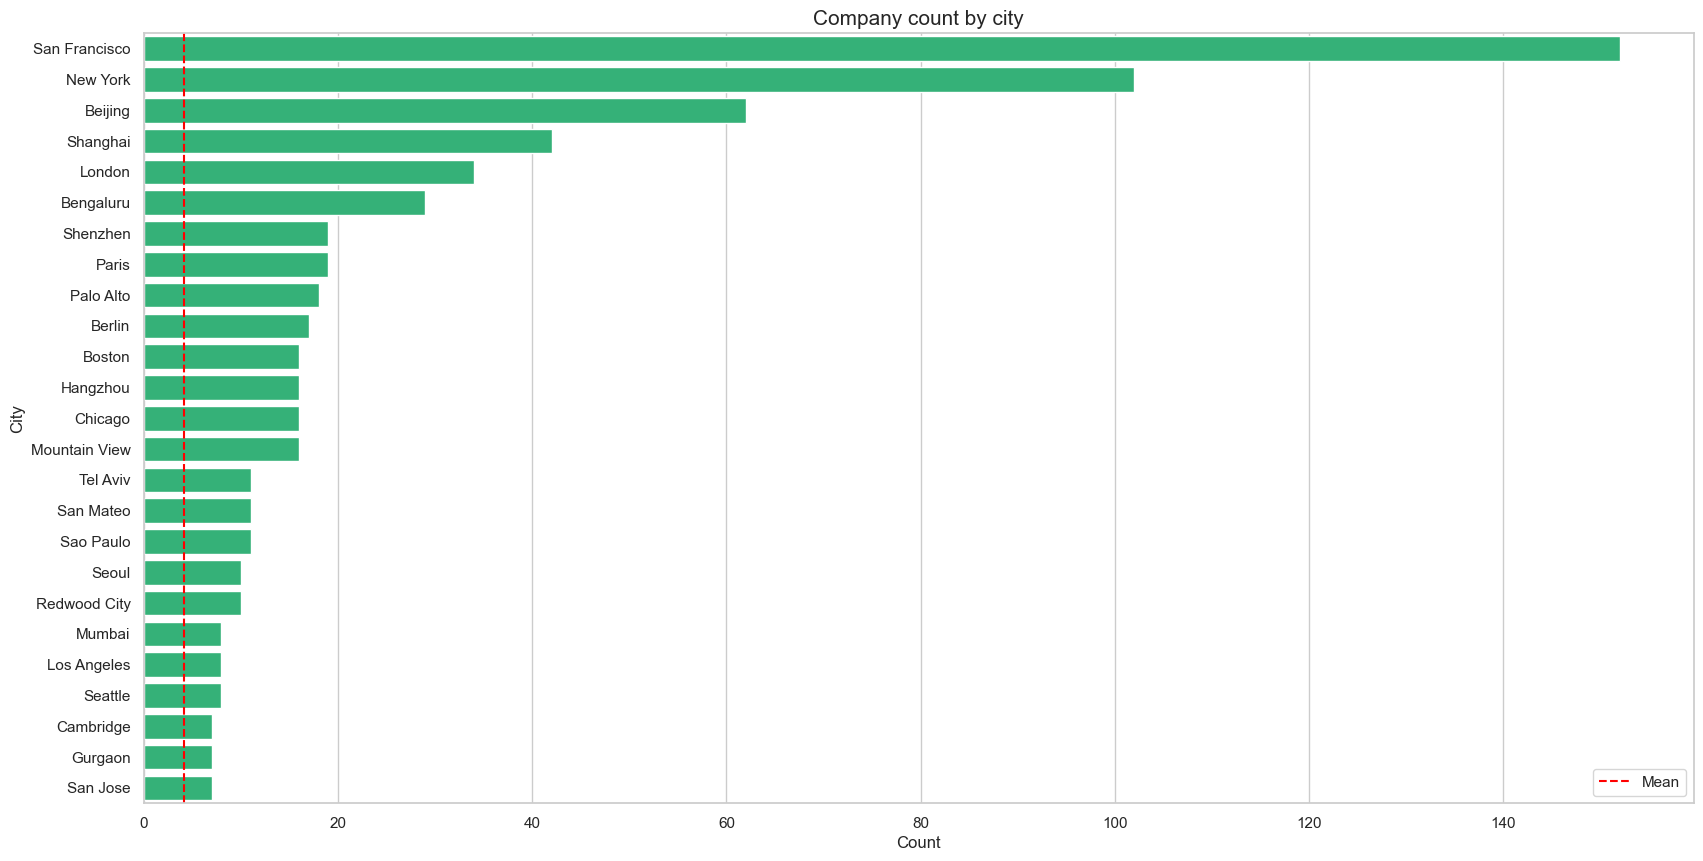

17.0% above average


In [19]:
vg.bargraph_with_delimitation(df, 'City', 25, [20, 10], "Company count by city", uf.average(df, 'City'))

**Country**

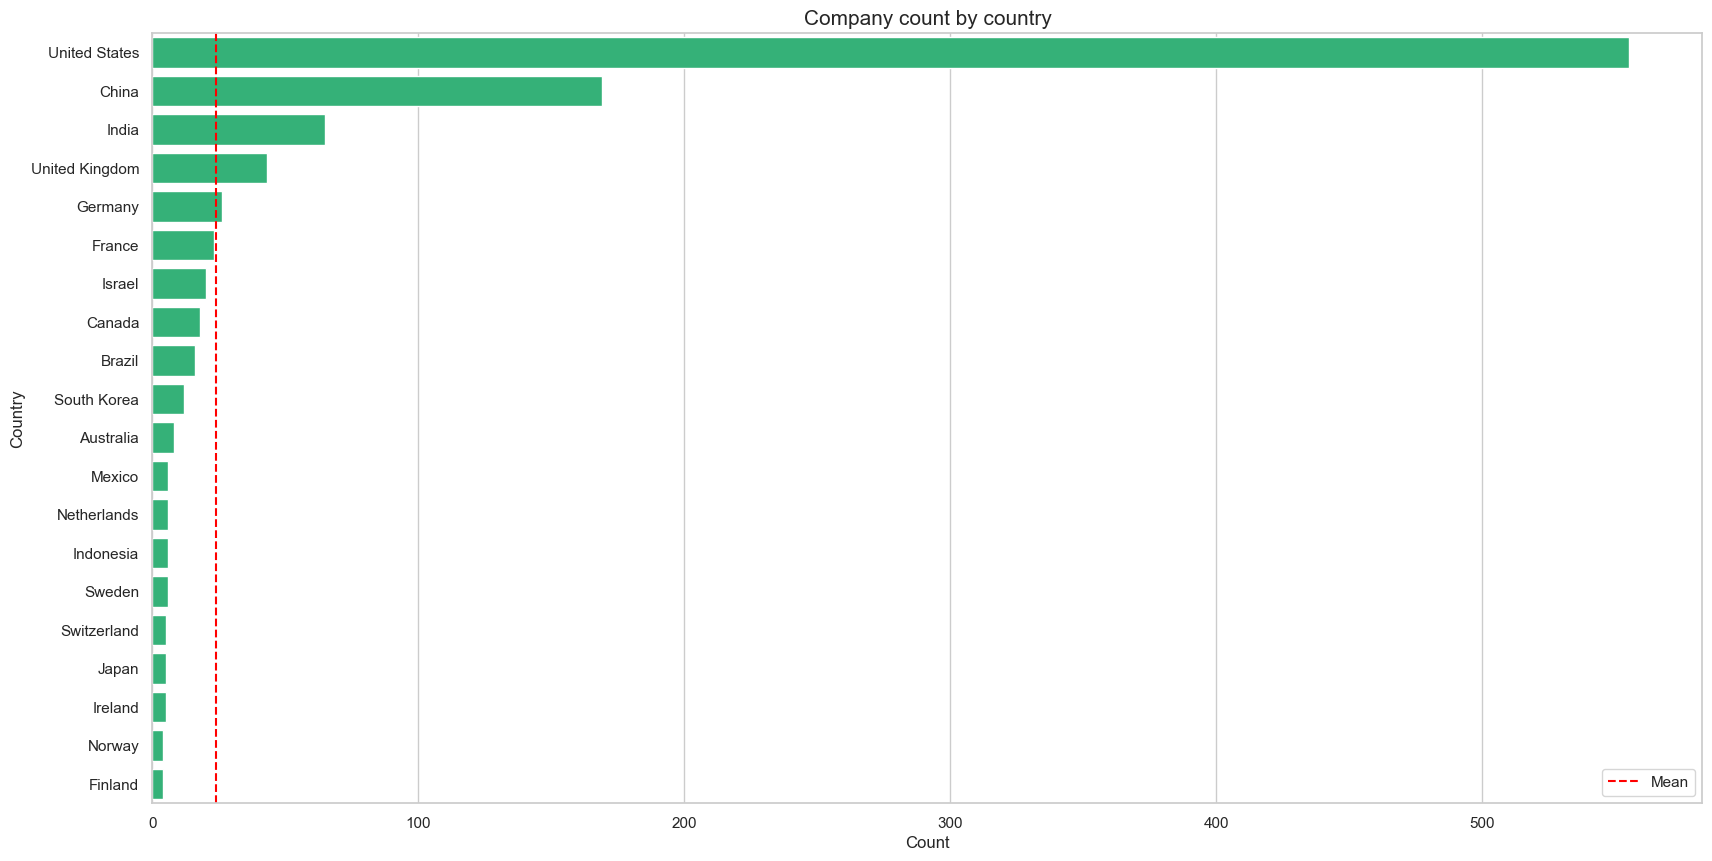

11.36% above average


In [20]:
vg.bargraph_with_delimitation(df, 'Country', 20, [20, 10], "Company count by country", uf.average(df, 'Country'))

**Continent**

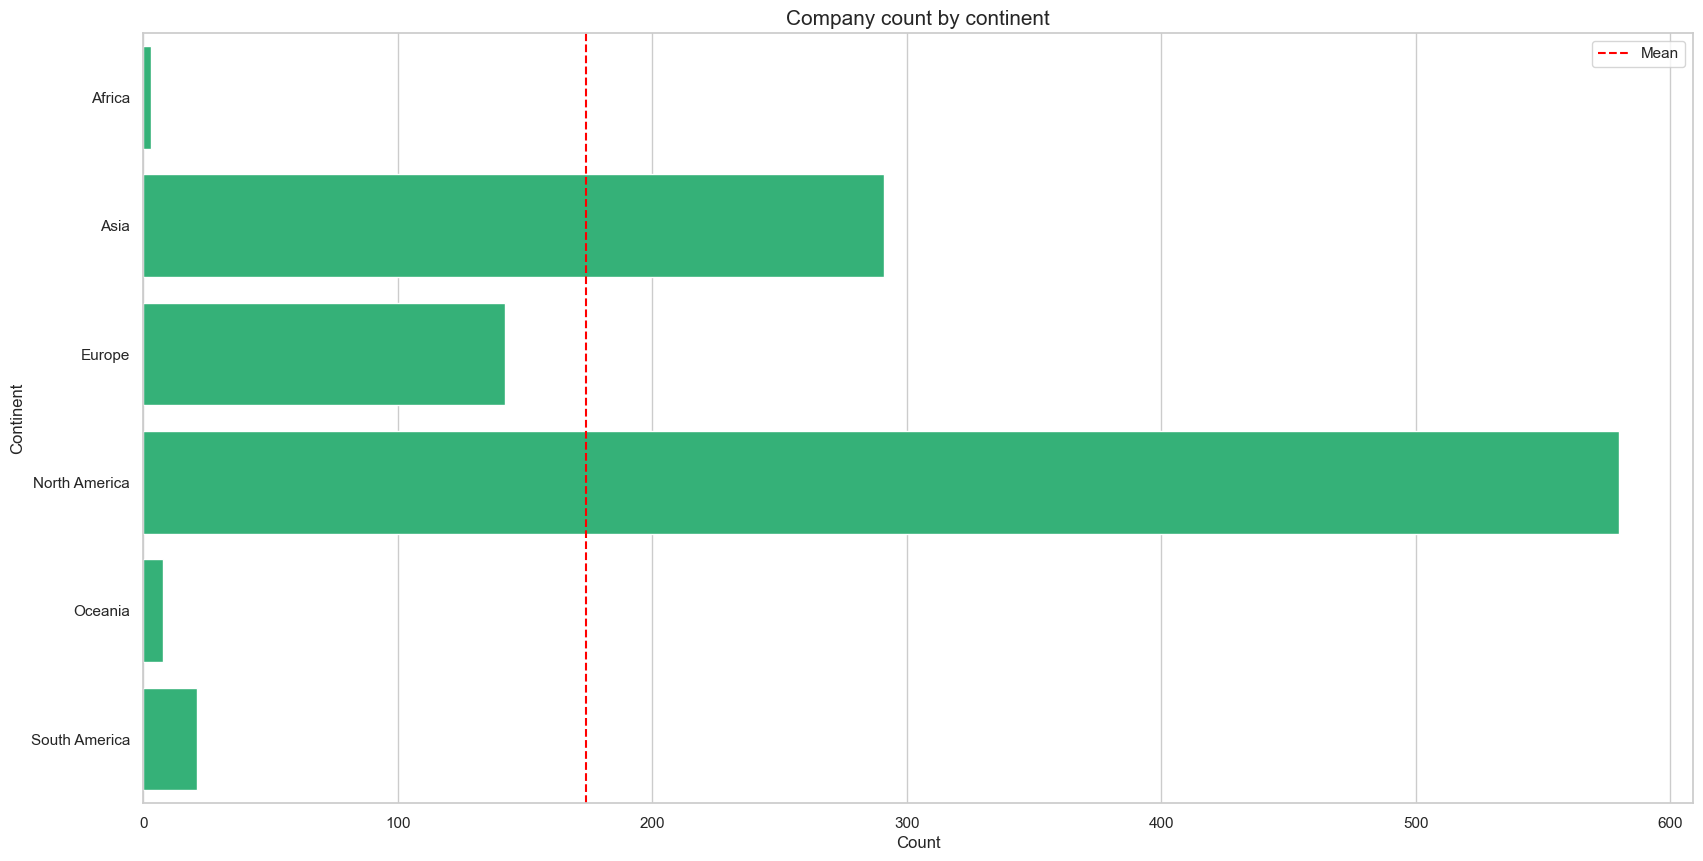

33.33% above average


In [21]:
vg.bargraph_without_delimitation(df, 'Continent', [20, 10], "Company count by continent", uf.average(df, 'Continent'))

**Year Founded**

In [22]:
(
    df['Year Founded']
    .astype('category')
    .value_counts()
    .reset_index()
    .rename({'index': 'Year Founded', 'Year Founded': 'Count'},  axis=1)
    .head()
)

,Year Founded,Count
0,2015,150
1,2016,109
2,2014,107
3,2012,93
4,2013,85


**Funding**

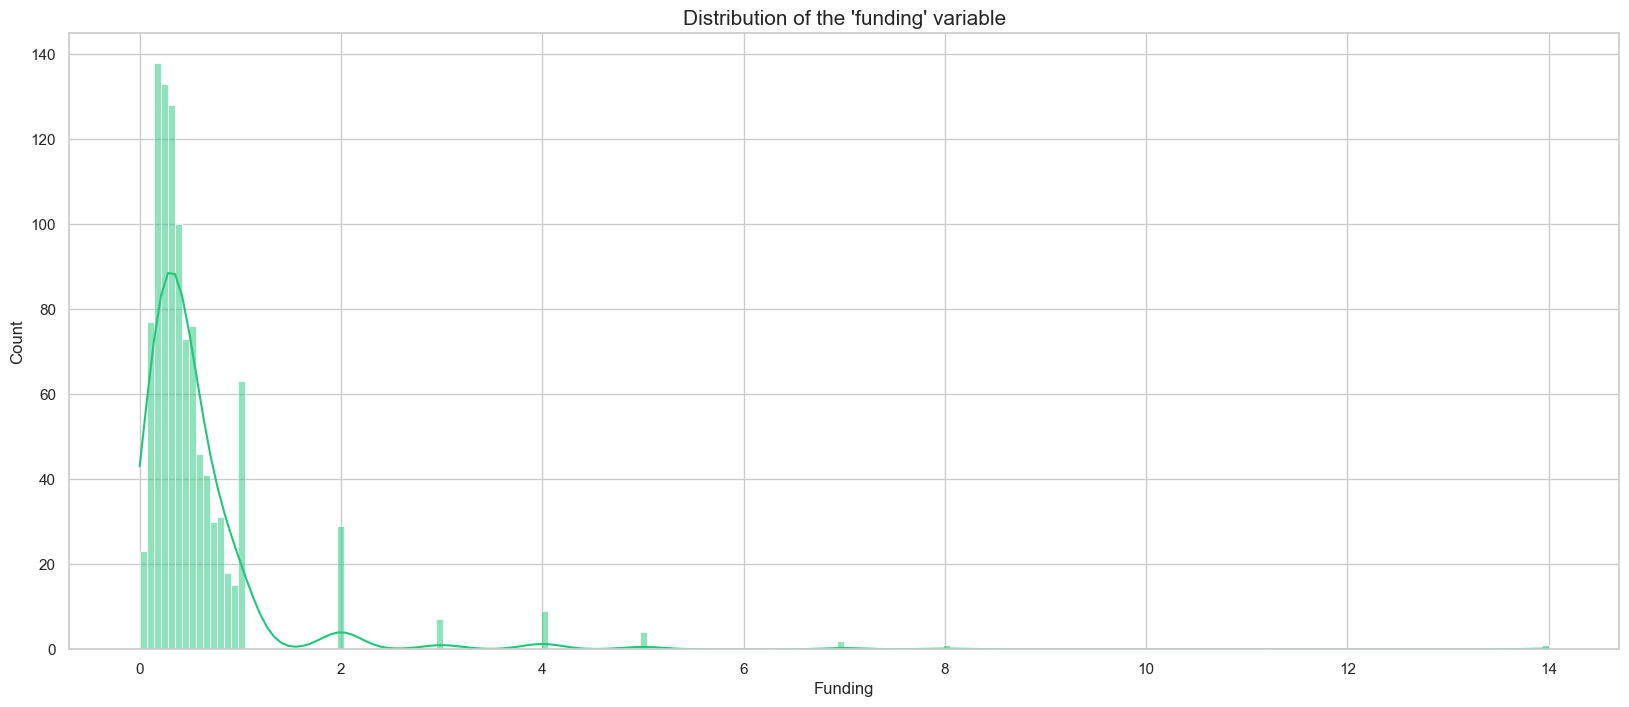

In [23]:
vg.histplot_variable_variation(df, 'Funding', [20,8], "Distribution of the 'funding' variable")

In [24]:
uf.numerical_variable_variation(df['Funding'])

Valor Minimo: 0.0
Valor Maximo: 14.0
Rango: 14.0
Media: 0.56
Desviacion Estandar: 0.81


### Correlation

locator: <matplotlib.ticker.AutoLocator object at 0x7fb896187e50>
top of Axes not in the figure, so title not moved
top of Axes not in the figure, so title not moved
top of Axes not in the figure, so title not moved
top of Axes not in the figure, so title not moved
top of Axes not in the figure, so title not moved


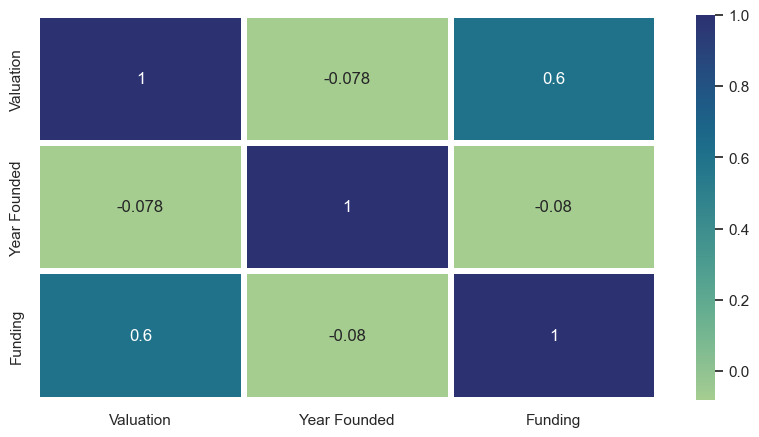

In [25]:
plt.figure(figsize=[10,5])
sns.heatmap(df.corr(), annot=True, linewidths=3, cmap="crest")
plt.show()

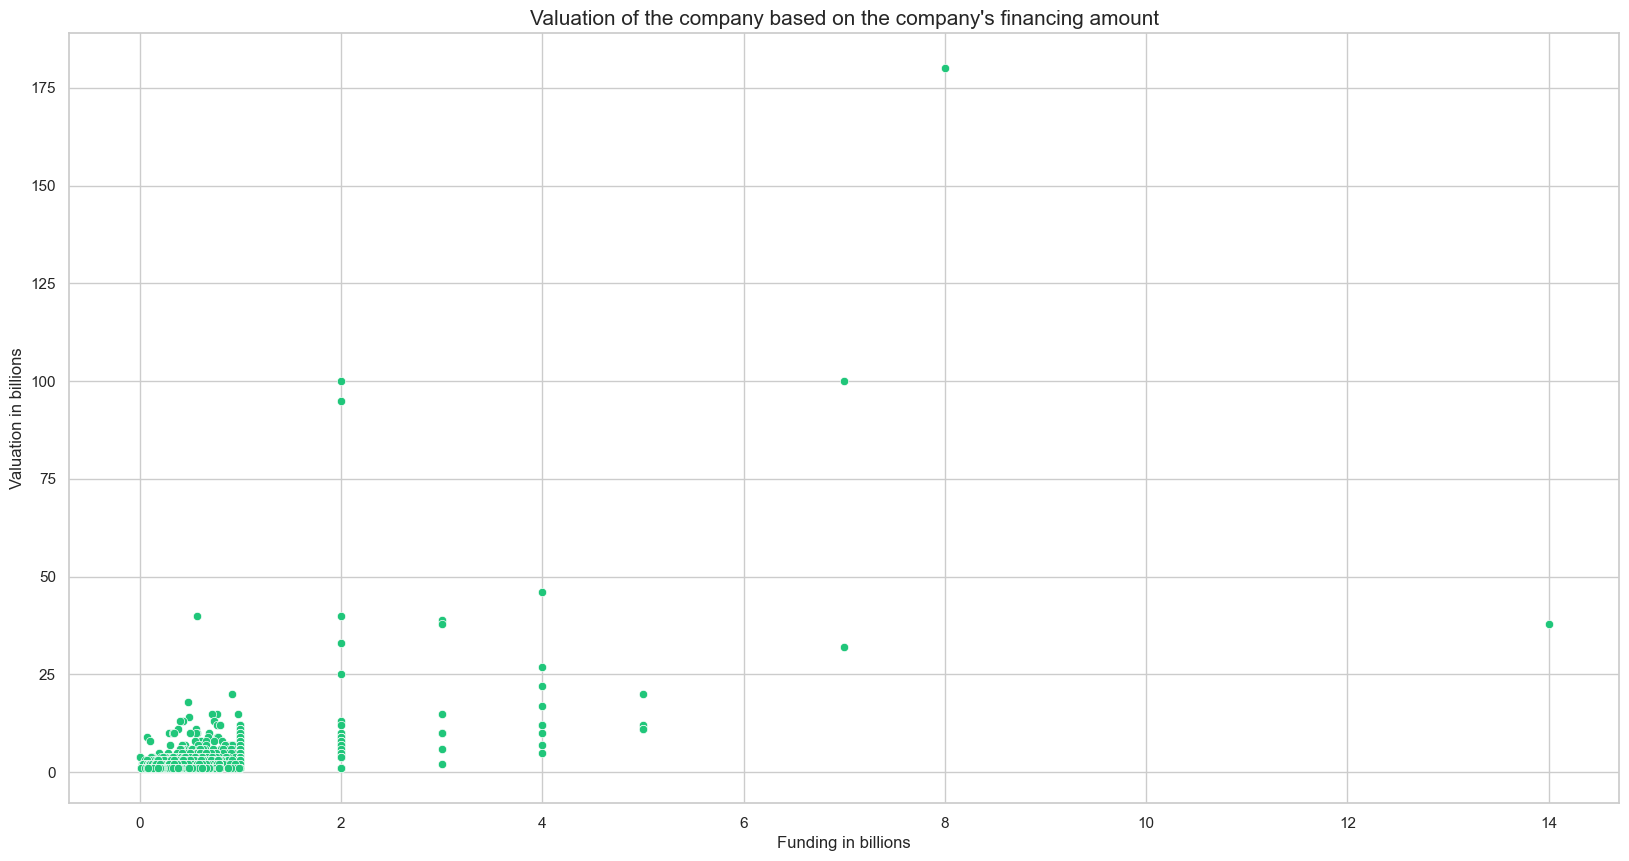

In [27]:
plt.figure(figsize=[20,10])

sns.scatterplot(x=df.Funding, y=df.Valuation, color='#20c67a')

plt.title("Valuation of the company based on the company's financing amount", fontsize=15)
plt.ylabel("Valuation in billions")
plt.xlabel("Funding in billions")

plt.show()